# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from math import atan, exp
from pprint import pprint
import numpy as np

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
data = {
    -1.0: 3.45,
    -.9: 3.04,
    -.8: 2.56,
    -.7: 3.45,
    -.6: 2.65,
    -.5: 2.94,
    -.4: 2.36,
    -.3: 2.46,
    -.2: 2.67,
    -.1: 3.68,
    0: 3.04,
    .1: 2.96,
    .2: 4.49,
    .3: 3.91,
    .4: 3.88,
    .5: 4.20,
    .6: 4.05,
    .7: 4.22,
    .8: 4.92,
    .9: 4.67,
    1: 5.16
}
x = list(data.keys())
y = list(data.values())

f = [lambda x: 1, lambda x: exp(-(x**2)), lambda x: atan(2*x)]

def get_fm(n, f=f):
  p = len(f)
  F = [0] * p
  for m in range(p):
    for i in range(n):
      F[m] += f[m](x[i]) * y[i]
  return np.array(F)

def get_cmk(n, f=f):
  p = len(f)
  C = [[0] * p for _ in 'zxc']
  for k in range(p):
    for m in range(p):
      for i in range(n):
        C[m][k] += f[m](x[i]) * f[k](x[i])
  return  np.array(C)

def reversal(m):
  try:
    rev = np.linalg.inv(m)
    return rev
  except np.linalg.LinAlgError:
    print("Матрица вырожденная или необратимая.")
    return None

def get_a(Cmk, Fm, f=f):
  p = len(f)
  a = [0] * p

  for m in range(p - 1):
    for k in range(m + 1, p):
        c = Cmk[k][m]/Cmk[m][m]
        for i in range(m, p):
            Cmk[k][i] -= Cmk[m][i]*c
        Fm[k] -= Fm[m]*c

  for i in range(p - 1, -1, -1):
    a[i] = Fm[i]
    for j in range(i + 1, p):
      a[i] -= a[j] * Cmk[i][j]
    a[i] /= Cmk[i][i]

  return a

def get_r_min(n, f=f):
  p = len(f)
  rmin = 0
  for i in range(n):
      res = y[i]
      for k in range(p):
          res -= a[k] * f[k](x[i])
      rmin += res**2
  return rmin

def get_d(n, rmin, Cmkr, f=f):
  p = len(f)
  D = [0] * p
  for k in range(p):
    D[k] = (rmin / (n - p) * Cmkr[k][k])**.5
  return D

def get_charts(a_arr, a, b, n=1000, f=f):

  def least_squares(x):
    p = len(f)
    new_f = lambda y: sum([(lambda x: a_arr[i] * f[i](x))(y) for i in range(p)])
    return new_f(x)

  def accurate_solution(x):
    p = len(f)
    a_arr = [4.8, -1.79, .81]
    new_f = lambda y: sum([(lambda x: a_arr[i] * f[i](x))(y) for i in range(p)])
    return new_f(x)

  x, y, xacc, yacc = [], [], [], []
  for i in range(1, 1000):
    x.append(a + b / i)
    y.append(accurate_solution(a + b / i))
    xacc.append(a + b /i)
    yacc.append(least_squares(a + b / i))
  return [x, y, xacc, yacc]

# Task

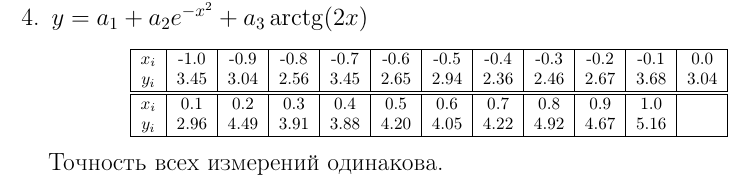

Fm:
array([74.76      , -1.33219889, 11.32345204])
Cmk:
array([[2.10000000e+01, 1.52920954e+01, 4.44089210e-16],
       [0.00000000e+00, 9.53571483e-01, 6.51945088e-17],
       [0.00000000e+00, 0.00000000e+00, 1.32014402e+01]])
Cmk^(-1):
array([[ 6.03705291e-01, -7.63650162e-01,  2.16936119e-18],
       [-7.63650162e-01,  1.04868908e+00, -5.17888718e-18],
       [ 2.16936119e-18, -5.17888718e-18,  7.57493111e-02]])
a:
[4.577333899390593, -1.3970624285908613, 0.8577436912623543]
rmin:
2.837015430997768
D:
[0.30846584769384194, 0.4065537479805969, 0.10926572210007894]
eps:
0.1576119683887649


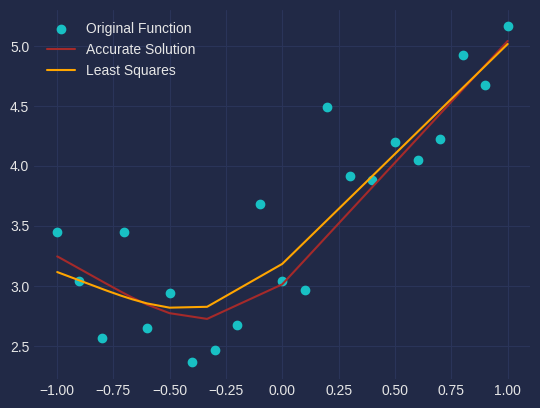

In [ ]:
n = len(x)
p = len(f)
Fm = get_fm(n)
Cmk = get_cmk(n)
Cmkr = reversal(Cmk)
a = get_a(Cmk, Fm)
rmin = get_r_min(n)
d = get_d(n, rmin, Cmkr)
eps = rmin / (n - p)
newx,newy,xacc,yacc = get_charts(a, -1, 2)

print('Fm:')
pprint(Fm)
print('Cmk:')
pprint(Cmk)
print('Cmk^(-1):')
pprint(Cmkr)
print('a:')
pprint(a)
print('rmin:')
pprint(rmin)
print('D:')
pprint(d)
print('eps:')
pprint(eps)

fig = plt.figure()
plt.scatter(x, y, label='Original Function')
plt.plot(newx, newy, color='brown', label='Accurate Solution')
plt.plot(xacc, yacc, color='orange', label='Least Squares')
plt.legend()